# DNA Sequencing with Machine Learning

## Introduction

Genom adalah kumpulan lengkap DNA dalam suatu organisme. Semua spesies hidup memiliki genom, tetapi ukurannya sangat berbeda. Genom manusia, misalnya, disusun menjadi 23 kromosom, yang sedikit mirip dengan ensiklopedia yang disusun menjadi 23 jilid. Dan jika Anda menghitung semua karakter (pasangan basa DNA individu), akan ada lebih dari 6 miliar di setiap genom manusia. Jadi ini kompilasi yang sangat besar.

Genom manusia memiliki sekitar 6 miliar karakter atau huruf. Jika menurut Anda genom (urutan DNA lengkap) seperti sebuah buku, itu adalah buku tentang 6 miliar huruf "A", "C", "G" dan "T". Sekarang, setiap orang memiliki genom yang unik. Namun demikian, para ilmuwan menemukan sebagian besar genom manusia mirip satu sama lain.

Sebagai ilmu berbasis data, genomik secara ekstensif menggunakan pembelajaran mesin untuk menangkap ketergantungan dalam data dan menyimpulkan hipotesis biologis baru. Meskipun demikian, kemampuan untuk mengekstrak wawasan baru dari volume data genomik yang meningkat secara eksponensial membutuhkan model pembelajaran mesin yang lebih kuat. Dengan memanfaatkan kumpulan data besar secara efisien, pembelajaran mendalam telah merekonstruksi bidang-bidang seperti visi komputer dan pemrosesan bahasa alami. Ini telah menjadi metode preferensi untuk banyak tugas pemodelan genomik, termasuk memprediksi pengaruh variasi genetik pada mekanisme pengaturan gen seperti penerimaan dan penyambungan DNA.

Jadi pada artikel ini, kita akan memahami bagaimana menginterpretasikan struktur DNA dan bagaimana algoritma pembelajaran mesin dapat digunakan untuk membangun model prediksi pada data sekuens DNA.

## Bagaimana Urutan DNA direpresentasikan ?

<img src="DoubleHelix.gif" style="display: block;
  margin-left: auto;
  margin-right: auto;
  width: 50%;" alt="DNA dalam diagram Double Helix">
<p style="display: block;
  margin-left: auto;
  margin-right: auto;
  width: 50%;">DNA dalam diagram Double Helix</p>

Heliks ganda adalah representasi kimiawi yang benar dari DNA. Tapi DNA itu spesial. Ini adalah nukleotida yang terbuat dari empat jenis basa nitrogen: Adenin (A), Timin (T), Guanin (G), dan Cytosine (C). Kami selalu memanggil mereka A, C, G dan T.

Keempat bahan kimia ini terhubung bersama melalui ikatan hidrogen dalam urutan apa pun yang memungkinkan membuat rantai, dan ini menghasilkan satu utas heliks ganda DNA. Dan utas kedua dari heliks ganda menyeimbangkan yang pertama. Jadi jika Anda memiliki A di utas pertama, Anda harus memiliki T di utas kedua.

Selanjutnya, C dan G selalu seimbang satu sama lain. Jadi, setelah Anda mengidentifikasi satu utas heliks, Anda selalu dapat mengeja yang lainnya.

<img src="Sequence.webp" style="display: block;
  margin-left: auto;
  margin-right: auto;
  width: 50%;">

Urutan, atau urutan, dari basa-basa ini, menentukan instruksi biologis apa yang terkandung dalam untaian DNA. 
Misalnya :
* ATCGTT mungkin menginstruksikan untuk mata biru
* ATCGCT mungkin menginstruksikan untuk cokelat.

## Handling data DNA dengan <b>Biopython</b>
Berikut adalah contoh singkat cara bekerja dengan urutan DNA dalam format fasta menggunakan Biopython. Objek sequence akan berisi atribut seperti id dan sequence serta panjang sequence yang dapat Anda kerjakan secara langsung.

Kami akan menggunakan Bio.SeqIO dari Biopython untuk mem-parsing data urutan DNA (fasta). Ini menyediakan antarmuka seragam sederhana untuk memasukkan dan mengeluarkan berbagai macam format file urutan.

In [1]:
from Bio import SeqIO
for sequence in SeqIO.parse('dataset/example_dna.fa', "fasta"):
    print(sequence.id)
    print(sequence.seq)
    print(len(sequence))

ENST00000435737.5
ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAAAGGAGTCCAGGGAATTTCTTTCAGTGTCACGGACTGTGCAGCAAGTGATAAACCTGGTTTATACAACATCTGCCTTCTCCAAATTTTATGAGCAGTCTGTTGTTGCAGATGTCAGCAACAACAAAGGCGGCCTCCTTGTCCACTTTTGGATTGTTTTTGTCATGCCACGTGCCAAAGGCCACATCTTCTGTGAAGACTGTGTTGCCGCCATCTTGAAGGACTCCATCCAGACAAGCATCATAAACCGGACCTCTGTGGGGAGCTTGCAGGGACTGGCTGTGGACATGGACTCTGTGGTACTAAATGAAGTCCTGGGGCTGACTCTCATTGTCTGGATTGACTGA
390
ENST00000419127.5
ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAAAGGAGTCCAGGGAATTTCTTTCAGTGTCACGGACTGTGCAGCAAGTGATAAACCTGGTTTATACAACATCTGCCTTCTCCAAATTTTATGAGCAGTCTGTTGTTGCAGATGTCAGCAACAACAAAGGCGGCCTCCTTGTCCACTTTTGGATTGTTTTTGTCATGCCACGTGCCAAAGGCCACATCTTCTGTGAAGACTGTGTTGCCGCCATCTTGAAGGACTCCATCCAGACAAGCATCATAAACCGGACCTCTGTGGGGAGCTTGCAGGGACTGGCTGTGGACATGGACTCTGTGGTACTAAATGACAAAGGCTGCTCTCAGTACTTCTATGCAGAGCATCTGTCTCTCCACTACCCGCTGGAGATTTCTGCAGCCTCAGGGAGGCTGATGTGTCACTTCAAGCTGGTGGCCATAGTGGGCTACCTGATTCGTCTCTCAATCAAGTCCATCCAAATCGAAGCCGACAACTGTGTCACTGACTCCCTGACCATTTACGACTCCCTTTTGCCCATCCGGAGCAG

Sehingga menghasilkan sequence ID, sequence dan panjang sequence.

## Sekarang kita dapat memuat dan memanipulasi data sequence biologis dengan mudah, bagaimana kita dapat menggunakannya untuk Machine Learning atau Deep Learning ?

Sekarang karena pembelajaran mesin atau model pembelajaran mendalam memerlukan input berupa matriks fitur atau nilai numerik dan saat ini kami masih memiliki data dalam format karakter atau string. Jadi langkah selanjutnya adalah menyandikan karakter-karakter ini ke dalam matriks.

Ada 3 pendekatan umum untuk menyandikan data urutan:

1. Urutan DNA pengkodean ordinal
2. Urutan DNA pengkodean satu-panas
3. Urutan DNA sebagai "bahasa", yang dikenal sebagai penghitungan k-mer

Jadi mari kita terapkan masing-masing dan lihat mana yang memberi kita fitur masukan yang sempurna.

## Data pengkodean urutan DNA ordinal
Dalam pendekatan ini, kita perlu menyandikan setiap basa nitrogen sebagai nilai ordinal. Misalnya “ATGC” menjadi [0,25, 0,5, 0,75, 1,0]. Basis lain seperti "N" bisa menjadi 0.

Jadi mari kita buat fungsi seperti untuk membuat objek array NumPy dari string urutan, dan label encoder dengan alfabet urutan DNA "a", "c", "g" dan "t", tetapi juga karakter untuk hal lain , "n".

In [3]:
import numpy as np
import re
def string_to_array(seq_string):
   seq_string = seq_string.lower()
   seq_string = re.sub('[^acgt]', 'n', seq_string)
   seq_string = np.array(list(seq_string))
   return seq_string

# membuat label encoder dengan alfabet 'acgtn' 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(np.array(['a','c','g','t','z']))

LabelEncoder()

Dan berikut adalah fungsi untuk menyandikan string urutan DNA sebagai vektor ordinal. Ia mengembalikan larik NumPy dengan A=0,25, C=0,50, G=0,75, T=1,00, n=0,00.

In [4]:
def ordinal_encoder(my_array):
    integer_encoded = label_encoder.transform(my_array)
    float_encoded = integer_encoded.astype(float)
    float_encoded[float_encoded == 0] = 0.25 # A
    float_encoded[float_encoded == 1] = 0.50 # C
    float_encoded[float_encoded == 2] = 0.75 # G
    float_encoded[float_encoded == 3] = 1.00 # T
    float_encoded[float_encoded == 4] = 0.00 # anything else, lets say n
    return float_encoded


#Let’s try it out a simple short sequence:
seq_test = 'TTCAGCCAGTG'
ordinal_encoder(string_to_array(seq_test))

array([1.  , 1.  , 0.5 , 0.25, 0.75, 0.5 , 0.5 , 0.25, 0.75, 1.  , 0.75])

## Pengkodean One-hot pada DNA Sequence
Pendekatan lain adalah dengan menggunakan pengkodean one-hot untuk mewakili urutan DNA. Ini banyak digunakan dalam metode pembelajaran mendalam dan cocok untuk algoritma seperti jaringan saraf convolutional. Dalam contoh ini, “ATGC” akan menjadi [0,0,0,1], [0,0,1,0], [0,1,0,0], [1,0,0,0]. Dan vektor yang disandikan satu-panas ini dapat digabungkan atau diubah menjadi Array 2 dimensi.

In [5]:
from sklearn.preprocessing import OneHotEncoder
def one_hot_encoder(seq_string):
    int_encoded = label_encoder.transform(seq_string)
    onehot_encoder = OneHotEncoder(sparse=False, dtype=int)
    int_encoded = int_encoded.reshape(len(int_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(int_encoded)
    onehot_encoded = np.delete(onehot_encoded, -1, 1)
    return onehot_encoded


#So let’s try it out with a simple short sequence:
seq_test = 'GAATTCTCGAA'
one_hot_encoder(string_to_array(seq_test))

c:\Users\Farras Daffa\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

## Urutan DNA sebagai "bahasa", yang dikenal sebagai penghitungan k-mer
Rintangan yang masih ada adalah bahwa tidak satu pun dari metode di atas menghasilkan vektor dengan panjang yang seragam, dan itu merupakan kebutuhan untuk memasukkan data ke algoritma klasifikasi atau regresi. Jadi dengan metode di atas, Anda harus menggunakan hal-hal seperti memotong urutan atau mengisi dengan "n" atau "0" untuk mendapatkan vektor dengan panjang seragam.

Urutan DNA dan protein dapat dilihat sebagai bahasa kehidupan. Bahasa mengkodekan instruksi serta fungsi untuk molekul yang ditemukan di semua bentuk kehidupan. Kemiripan bahasa urutan berlanjut dengan genom sebagai buku, subsekuens (gen dan keluarga gen) adalah kalimat dan bab, k-mers dan peptida adalah kata-kata, dan basa nukleotida dan asam amino adalah abjad. Karena hubungan tersebut tampaknya sangat mungkin, masuk akal bahwa pemrosesan bahasa alami (NLP) juga harus mengimplementasikan bahasa alami urutan DNA dan protein.

Metode yang kami gunakan di sini dapat dikelola dan mudah. Kami pertama-tama mengambil urutan biologis yang panjang dan memecahnya menjadi "kata-kata" panjang k-mer yang tumpang tindih. Misalnya, jika kita menggunakan "kata" dengan panjang 6 (hexamers), "ATGCATGCA" menjadi: 'ATGCAT', 'TGCATG', 'GCATGC', 'CATGCA'. Karenanya urutan contoh kami dipecah menjadi 4 kata hexamer.

Dalam genomik, kami menyebut jenis manipulasi ini sebagai "penghitungan k-mer", atau menghitung kemunculan setiap kemungkinan urutan k-mer dan alat pemrosesan bahasa alami Python membuatnya sangat mudah.


In [6]:
def Kmers_funct(seq, size):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]


# Mencoba dengan sequence yang mudah
mySeq = 'GTGCCCAGGTTCAGTGAGTGACACAGGCAG'
Kmers_funct(mySeq, size=7)

['gtgccca',
 'tgcccag',
 'gcccagg',
 'cccaggt',
 'ccaggtt',
 'caggttc',
 'aggttca',
 'ggttcag',
 'gttcagt',
 'ttcagtg',
 'tcagtga',
 'cagtgag',
 'agtgagt',
 'gtgagtg',
 'tgagtga',
 'gagtgac',
 'agtgaca',
 'gtgacac',
 'tgacaca',
 'gacacag',
 'acacagg',
 'cacaggc',
 'acaggca',
 'caggcag']

Ini mengembalikan daftar "kata-kata" k-mer. Anda kemudian dapat menggabungkan "kata" menjadi "kalimat", lalu menerapkan metode pemrosesan bahasa alami favorit Anda pada "kalimat" seperti biasa.

In [7]:
words = Kmers_funct(mySeq, size=6)
joined_sentence = ' '.join(words)
joined_sentence

'gtgccc tgccca gcccag cccagg ccaggt caggtt aggttc ggttca gttcag ttcagt tcagtg cagtga agtgag gtgagt tgagtg gagtga agtgac gtgaca tgacac gacaca acacag cacagg acaggc caggca aggcag'

Kita dapat menyetel panjang kata dan jumlah tumpang tindih. Ini memungkinkan Anda untuk menentukan bagaimana informasi sekuens DNA dan ukuran kosa kata akan menjadi penting dalam aplikasi Anda. Misalnya, jika Anda menggunakan kata-kata dengan panjang 6, dan ada 4 huruf, Anda memiliki kosa kata sebanyak 4096 kemungkinan kata. Anda kemudian dapat melanjutkan dan membuat model kumpulan kata-kata seperti yang Anda lakukan di NLP.

Mari kita buat beberapa "kalimat" lagi agar lebih menarik.


In [8]:
mySeq1 = 'TCTCACACATGTGCCAATCACTGTCACCC'
mySeq2 = 'GTGCCCAGGTTCAGTGAGTGACACAGGCAG'
sentence1 = ' '.join(Kmers_funct(mySeq1, size=6))
sentence2 = ' '.join(Kmers_funct(mySeq2, size=6))

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform([joined_sentence, sentence1, sentence2]).toarray()
X

array([[0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 1],
       [1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 1]], dtype=int64)

## Machine Learning for DNA Sequencing
Ini dia pembelajaran mesin…

Sekarang setelah kita mempelajari cara mengekstraksi matriks fitur dari urutan DNA, mari kita terapkan pengetahuan yang baru kita peroleh ke kasus penggunaan pembelajaran mesin di kehidupan nyata.

### Tujuan: 
Membangun model klasifikasi yang dilatih tentang urutan DNA manusia dan dapat memprediksi keluarga gen berdasarkan urutan DNA dari urutan pengkodean. Untuk menguji model, kami akan menggunakan urutan DNA manusia, anjing, dan simpanse dan membandingkan keakuratannya.

Keluarga gen adalah kelompok gen terkait yang memiliki nenek moyang yang sama. Anggota keluarga gen dapat berupa paralog atau ortolog. Paralog gen adalah gen dengan urutan serupa dari dalam spesies yang sama sedangkan ortolog gen adalah gen dengan urutan serupa pada spesies berbeda.

Dataset berisi urutan DNA manusia, urutan DNA Anjing, dan urutan DNA Simpanse.

In [13]:
import numpy as np # Aljabar Linear
import pandas as pd # data processing
import os
import matplotlib.pyplot as plt
%matplotlib inline
for dirname, _, filenames in os.walk('./dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./dataset\chimpanzee.txt
./dataset\dog.txt
./dataset\example_dna.fa
./dataset\human.txt


## Data DNA Manusia

In [12]:
human_dna = pd.read_table('./dataset/human.txt')
human_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


Text(0.5, 1.0, 'Class distribution of Human DNA')

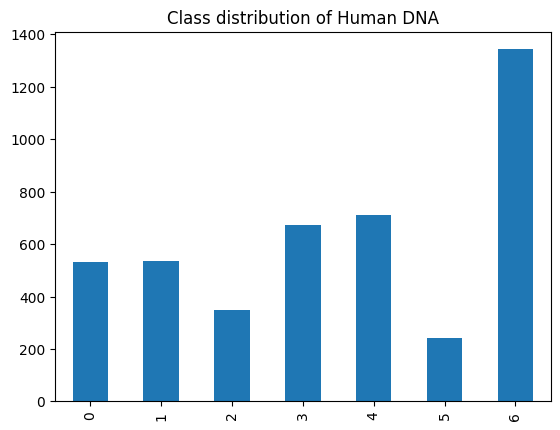

In [14]:
human_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Human DNA")

## Data DNA Simpanse

In [15]:
chimp_dna = pd.read_table('./dataset/chimpanzee.txt')
chimp_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


Text(0.5, 1.0, 'Class distribution of Chimpanzee DNA')

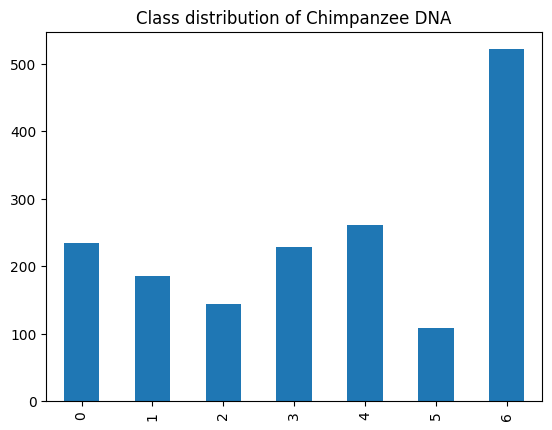

In [16]:
chimp_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Chimpanzee DNA")

## Data DNA Anjing

In [17]:
dog_dna = pd.read_table('./dataset/dog.txt')
dog_dna.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


Text(0.5, 1.0, 'Class distribution of Dog DNA')

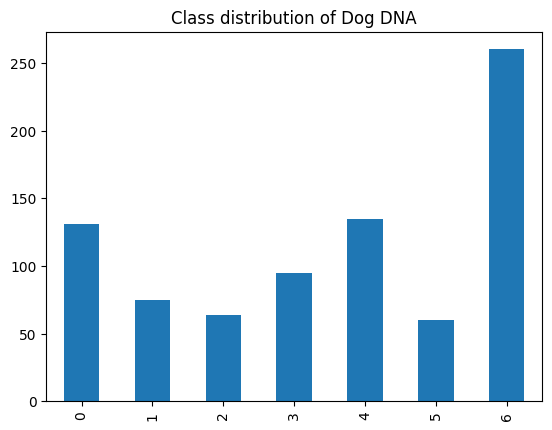

In [18]:
dog_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Dog DNA")

Sekarang kita telah memuat semua data kita, langkah selanjutnya adalah mengubah urutan karakter menjadi kata-kata k-mer, <b>ukuran default = 6 (hexamers)</b>. Fungsi <b>Kmers_funct()</b> akan mengumpulkan semua kemungkinan k-mers yang tumpang tindih dengan panjang tertentu dari string urutan apa pun.

In [19]:
def Kmers_funct(seq, size=6):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

#convert our training data sequences into short overlapping k-mers of length 6. 
#Lets do that for each species of data we have using our Kmers_funct function.

human_dna['words'] = human_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
human_dna = human_dna.drop('sequence', axis=1)

chimp_dna['words'] = chimp_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
chimp_dna = chimp_dna.drop('sequence', axis=1)

dog_dna['words'] = dog_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
dog_dna = dog_dna.drop('sequence', axis=1)

Urutan DNA diubah menjadi huruf kecil, dibagi menjadi semua kemungkinan kata k-mer dengan panjang 6, dan siap untuk langkah selanjutnya.

In [20]:
human_dna.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


Sekarang kita perlu mengonversi daftar k-mers untuk setiap gen menjadi rangkaian kalimat kata-kata yang dapat digunakan untuk membuat model Bag of Words. Kami akan membuat variabel target y untuk menampung label kelas.

In [21]:
human_texts = list(human_dna['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
#separate labels
y_human = human_dna.iloc[:, 0].values # y_human for human_dna

Lakukan hal yang sama pada Data DNA Anjing dan Simpanse

In [22]:
chimp_texts = list(chimp_dna['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
#separate labels
y_chim = chimp_dna.iloc[:, 0].values # y_chim for chimp_dna

dog_texts = list(dog_dna['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
#separate labels
y_dog = dog_dna.iloc[:, 0].values  # y_dog for dog_dna

In [24]:
y_human

array([4, 4, 3, ..., 6, 6, 6], dtype=int64)

In [25]:
y_chim

array([4, 4, 4, ..., 6, 3, 3], dtype=int64)

In [26]:
y_dog

array([4, 4, 6, 6, 0, 6, 0, 0, 0, 0, 0, 6, 6, 0, 0, 0, 6, 0, 0, 0, 0, 0,
       6, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 0, 0, 0, 3, 0, 6, 0, 6, 0, 6, 0,
       6, 0, 0, 3, 3, 6, 6, 6, 6, 4, 0, 0, 4, 2, 0, 0, 0, 0, 6, 0, 6, 0,
       0, 5, 5, 6, 4, 6, 0, 0, 3, 6, 3, 6, 6, 6, 6, 6, 4, 6, 4, 1, 4, 0,
       0, 0, 6, 4, 4, 6, 6, 6, 6, 6, 4, 6, 6, 3, 3, 3, 3, 0, 6, 3, 3, 6,
       4, 4, 5, 6, 6, 1, 5, 2, 2, 1, 4, 2, 6, 3, 3, 6, 6, 6, 3, 3, 6, 6,
       6, 3, 6, 6, 2, 0, 0, 6, 6, 3, 3, 3, 0, 0, 4, 6, 6, 5, 1, 1, 0, 0,
       0, 4, 0, 4, 0, 0, 3, 4, 6, 0, 6, 6, 3, 4, 0, 6, 6, 1, 2, 2, 2, 3,
       6, 2, 2, 2, 6, 0, 0, 6, 6, 0, 0, 1, 6, 5, 5, 6, 0, 6, 0, 0, 4, 0,
       0, 3, 4, 0, 0, 6, 6, 5, 5, 3, 4, 1, 0, 6, 5, 6, 6, 4, 4, 2, 2, 2,
       4, 6, 4, 4, 2, 1, 3, 6, 0, 6, 2, 3, 0, 0, 6, 0, 6, 4, 3, 1, 1, 4,
       6, 4, 4, 6, 3, 3, 2, 2, 1, 1, 3, 3, 4, 3, 0, 3, 5, 5, 5, 5, 5, 5,
       5, 2, 2, 4, 4, 6, 4, 4, 6, 6, 6, 0, 3, 3, 4, 3, 0, 0, 6, 0, 0, 6,
       6, 1, 5, 5, 0, 0, 6, 6, 1, 1, 1, 4, 2, 2, 3,

Jadi variabel target berisi array nilai Class.

Membuat model Bag of Words menggunakan <b>CountVectorizer()</b>. Ini setara dengan penghitungan k-mer. Ukuran n-gram 4 sebelumnya ditentukan dengan pengujian.

Ubah kata-kata k-mer kita menjadi vektor numerik dengan panjang seragam yang mewakili hitungan untuk setiap k-mer dalam kosakata:

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4)) #The n-gram size of 4 is previously determined by testing
X = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

In [28]:
print("Manusia : ", X.shape)
print("Simpanse : ", X_chimp.shape)
print("Anjing : ", X_dog.shape)

Manusia :  (4380, 232414)
Simpanse :  (1682, 232414)
Anjing :  (820, 232414)


Jadi, untuk manusia kita memiliki <b>4380</b> gen yang diubah menjadi vektor fitur panjang seragam dengan hitungan 4 gram k-mer (panjang 6). Untuk simpanse dan anjing, kami memiliki jumlah fitur yang sama dengan masing-masing <b>1682</b> dan <b>820</B> gen.

Jadi sekarang kita tahu bagaimana mengubah sekuens DNA kita menjadi vektor numerik panjang seragam dalam bentuk jumlah k-mer dan ngram, kita sekarang dapat melanjutkan dan membangun model klasifikasi yang dapat memprediksi fungsi sekuens DNA hanya berdasarkan pada sekuens itu sendiri .

Di sini saya akan menggunakan data manusia untuk melatih model, mengulurkan 20% dari data manusia untuk menguji model. Kemudian kita dapat menantang generalisasi model dengan mencoba memprediksi fungsi urutan pada spesies lain (simpanse dan anjing).

Selanjutnya, latih/uji pisahkan dataset manusia dan buat pengklasifikasi multinomial naif Bayes sederhana.

Anda mungkin ingin melakukan beberapa penyetelan parameter dan membuat model dengan ukuran ngram yang berbeda, di sini saya akan melanjutkan dengan ukuran ngram 4 dan model alfa 0,1.


In [29]:
# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_human, 
                                                    test_size = 0.20, 
                                                    random_state=42)

Kami akan membuat pengklasifikasi naif Bayes multinomial. Saya sebelumnya melakukan beberapa penyetelan parameter dan menemukan ukuran ngram 4 (tercermin dalam instance Countvectorizer()) dan model alfa 0,1 melakukan yang terbaik. Sederhananya, saya tidak akan menunjukkan kode itu di sini.

In [30]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

## Sekarang mari kita buat prediksi pada set pengujian manusia dan lihat bagaimana kinerjanya pada data yang tidak terlihat.

In [31]:
y_pred = classifier.predict(X_test)

Oke, jadi mari kita lihat beberapa metrik kinerja model seperti matriks konfusi, akurasi, presisi, daya ingat, dan skor f1. Kami mendapatkan hasil yang sangat bagus pada data tak terlihat kami, jadi sepertinya model kami tidak sesuai dengan data pelatihan. Dalam proyek nyata saya akan kembali dan mencicipi lebih banyak pemisahan uji kereta karena kami memiliki kumpulan data yang relatif kecil.

In [32]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix for predictions on human test DNA sequence\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on human test DNA sequence

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984


Sekarang untuk test sesungguhnya. Mari kita lihat bagaimana model kita bekerja pada urutan DNA dari spesies lain. Pertama kita akan mencoba Simpanse, yang kita perkirakan sangat mirip dengan manusia. Kemudian kita akan mencoba sahabat pria (dan wanita), urutan DNA Anjing.

In [33]:
# Memprediksi sekuens Simpanse
y_pred_chimp = classifier.predict(X_chimp)

In [34]:
# Gen Simpanse
print("Confusion matrix for predictions on Chimpanzee test DNA sequence\n")
print(pd.crosstab(pd.Series(y_chim, name='Actual'), pd.Series(y_pred_chimp, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_chim, y_pred_chimp)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on Chimpanzee test DNA sequence

Predicted    0    1    2    3    4    5    6
Actual                                      
0          232    0    0    0    0    0    2
1            0  184    0    0    0    0    1
2            0    0  144    0    0    0    0
3            0    0    0  227    0    0    1
4            2    0    0    0  254    0    5
5            0    0    0    0    0  109    0
6            0    0    0    0    0    0  521
accuracy = 0.993 
precision = 0.994 
recall = 0.993 
f1 = 0.993


In [35]:
# Memprediksi sekuens Anjing
y_pred_dog = classifier.predict(X_dog)

In [36]:
# Gen Anjing
print("Confusion matrix for predictions on Dog test DNA sequence\n")
print(pd.crosstab(pd.Series(y_dog, name='Actual'), pd.Series(y_pred_dog, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_dog, y_pred_dog)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on Dog test DNA sequence

Predicted    0   1   2   3    4   5    6
Actual                                  
0          127   0   0   0    0   0    4
1            0  63   0   0    1   0   11
2            0   0  49   0    1   0   14
3            1   0   0  81    2   0   11
4            4   0   0   1  126   0    4
5            4   0   0   0    1  53    2
6            0   0   0   0    0   0  260
accuracy = 0.926 
precision = 0.934 
recall = 0.926 
f1 = 0.925


## Kesimpulan
Model tersebut tampaknya memberikan hasil yang baik pada data manusia. Itu juga terjadi pada Simpanse karena Simpanse dan manusia memiliki hierarki genetik yang sama. Performa anjing tidak sebaik simpanse karena anjing lebih menyimpang dari manusia daripada simpanse.